<a href="https://colab.research.google.com/github/lephuocdat2000/Advanced-CV/blob/main/Trainyolov4onlyperson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
%cd /content/gdrive/My\ Drive/darknet

import glob2
import math  
import os
import numpy as np

image_files = glob2.glob(os.path.join("data/persondata_train/","*.png"))
nb_val = math.floor(len(image_files)*0.2)
rand_idx = np.random.randint(0, len(image_files), nb_val)
# Tạo file train.txt
with open("train.txt", "w") as f:
  for idx in np.arange(len(image_files)):
    if (os.path.exists(image_files[idx][:-3] + "txt") and (idx not in rand_idx)):
      f.write(image_files[idx]+'\n')

# Tạo file vali.txt
with open("val.txt", "w") as f:
  for idx in np.arange(len(image_files)+1):
    if (idx in rand_idx) and (os.path.exists(image_files[idx][:-3] + "txt")):
      f.write(image_files[idx]+'\n')

/content/gdrive/My Drive/darknet


In [2]:
%cd /content/gdrive/My\ Drive/darknet
!rm darknet
!make

/content/gdrive/My Drive/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o obj/yolo.o obj/detector.o obj/layer.o obj/compare.o obj/classifier.o obj/

In [ ]:
! ./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output /content/gdrive/MyDrive/Advanced-CV/00pedxing01-superJumbo.jpg


In [3]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [27]:
def load_network_1(config_file, data_file, weights, batch_size=1):
    """
    load model description and weights from config files
    args:
        config_file (str): path to .cfg model file
        data_file (str): path to .data model file
        weights (str): path to weights
    returns:
        network: trained model
        class_names
        class_colors
    """
    network = load_net_custom(
        config_file.encode("ascii"),
        weights.encode("ascii"), 0, batch_size)
    metadata = load_meta(data_file.encode("ascii"))
    class_names = [metadata.names[i].decode("ascii") for i in range(1)]
    colors = class_colors(class_names)
    return network, class_names, colors

def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

def Detection(detections,image):
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(image, (left, top), (right, bottom),(0,255,0), 2)
    # cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
    #                   (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
    #                   class_colors[label], 2)
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.show()

In [5]:
from darknet import *
#608X608
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network_1("cfg/yolov4.cfg", "cfg/coco.data", "yolov4.weights")
width = network_width(network)
height = network_height(network)

person
person
person
person
person
person
person


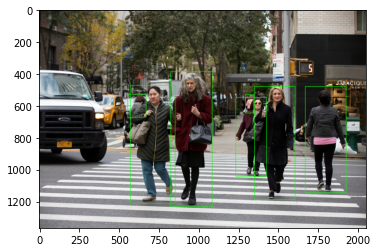

In [26]:
image = cv2.imread("/content/gdrive/MyDrive/Advanced-CV/00pedxing01-superJumbo.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)
boxes = [bbox for _,_,bbox in detections]
Detection(detections,image)

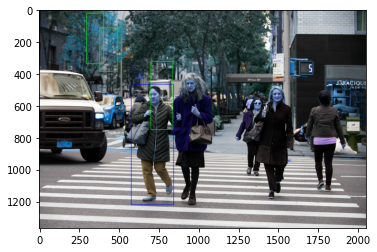

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/gdrive/MyDrive/Advanced-CV/00pedxing01-superJumbo.jpg')
cv2.rectangle(image,(240,192),(577+266,465+754),(0,0,255),2)
cv2.rectangle(image,(700,322),(700+138,332+416),(0,255,0),2)
# cv2.rectangle(image,(249,99),(249+89,99+336),(0,255,0),2)
cv2.rectangle(image,(297,19),(297+107,19+317),(0,255,0),2)
cv2.rectangle(image,(380,111),(380+113,111+273),(0,255,0),2)
plt.imshow(image)
plt.show()

In [ ]:
! ./darknet detector train yolo.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights -dont_show -map

In [ ]:
!./darknet detector map yolo.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights -dont_show 